<a href="https://colab.research.google.com/github/Akhilanandateja/Data_analysis_using_Python/blob/main/DAUP_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from scipy.stats import skew, kurtosis

In [18]:
import pandas as pd
try:
    data = pd.read_csv('Bank_Customer.csv')
    print("Dataset loaded successfully.")
    print(data.head()) # Display the first few rows
except FileNotFoundError:
    print("Error: 'your_dataset.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Dataset loaded successfully.
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15598695    Fields          619    France  Female   42   
1          2    15649354  Johnston          608     Spain  Female   41   
2          3    15737556  Vasilyev          502    France  Female   42   
3          4    15671610    Hooper          699    France  Female   39   
4          5    15625092   Colombo          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   

In [19]:
numerical_variables = ['Balance', 'CreditScore', 'EstimatedSalary']
summary_stats = {}
for var in numerical_variables:
  if var in data.columns:
    summary_stats[var] = {
        'mean': data[var].mean(),
        'median': data[var].median(),
        'std': data[var].std(),
        'skewness': skew(data[var]),
        'kurtosis': kurtosis(data[var])
    }
  else:
      print(f"Warning: Variable '{var}' not found in the dataset.")
for var, stats in summary_stats.items():
  print(f"Summary statistics for {var}:")
  for stat_name, stat_value in stats.items():
    print(f"  {stat_name}: {stat_value}")

Summary statistics for Balance:
  mean: 76485.889288
  median: 97198.54000000001
  std: 62397.40520238623
  skewness: -0.14108754375291138
  kurtosis: -1.489267106315331
Summary statistics for CreditScore:
  mean: 650.5288
  median: 652.0
  std: 96.65329873613061
  skewness: -0.07159586676212397
  kurtosis: -0.42611279176518124
Summary statistics for EstimatedSalary:
  mean: 100090.239881
  median: 100193.915
  std: 57510.49281769822
  skewness: 0.0020850448448748848
  kurtosis: -1.181527710874237


In [20]:
gender_distribution = data['Gender'].value_counts(normalize=True) * 100
print("Gender Distribution:\n", gender_distribution)
geography_distribution = data['Geography'].value_counts(normalize=True) * 100
print("\nGeography Distribution:\n", geography_distribution)

age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)
age_distribution = data['AgeGroup'].value_counts(normalize=True) * 100
print("\nAge Distribution:\n", age_distribution)

combined_distribution = data.groupby(['Gender', 'Geography', 'AgeGroup']).size().unstack(fill_value=0)
print("\nCombined Distribution (Gender, Geography, AgeGroup):\n", combined_distribution)

Gender Distribution:
 Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64

Geography Distribution:
 Geography
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64

Age Distribution:
 AgeGroup
31-40    43.46
41-50    26.18
21-30    15.92
51-60     8.69
61-70     3.75
71-80     1.36
0-20      0.49
80+       0.15
Name: proportion, dtype: float64

Combined Distribution (Gender, Geography, AgeGroup):
 AgeGroup          0-20  21-30  31-40  41-50  51-60  61-70  71-80  80+
Gender Geography                                                     
Female France        5    393    977    580    174     88     38    6
       Germany       6    165    455    368    141     40     18    0
       Spain         2    179    452    299    106     37     14    0
Male   France       17    451   1273    662    208    108     30    4
       Germany       8    193    542    372    136     44     18    3
       Spain        11    211    647    337    104     58  

<ipython-input-20-6af2266af398>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combined_distribution = data.groupby(['Gender', 'Geography', 'AgeGroup']).size().unstack(fill_value=0)


In [21]:
import pandas as pd
try:
    data = pd.read_csv('Bank_Customer.csv')
    transaction_stats = data.groupby('IsActiveMember')['NumOfProducts'].agg(['min', 'max', 'mean'])

    print("\nTransaction Statistics by Active Status:\n", transaction_stats)

except FileNotFoundError:
    print("Error: 'Bank_Customer.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Transaction Statistics by Active Status:
                 min  max      mean
IsActiveMember                    
0                 1    4  1.524438
1                 1    4  1.535624



Correlation Matrix:
                CreditScore   Balance  NumOfProducts
CreditScore       1.000000  0.006268       0.012238
Balance           0.006268  1.000000      -0.304180
NumOfProducts     0.012238 -0.304180       1.000000


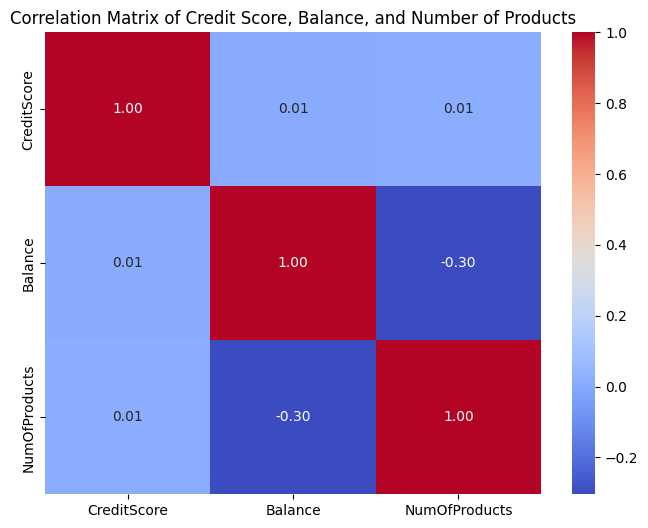

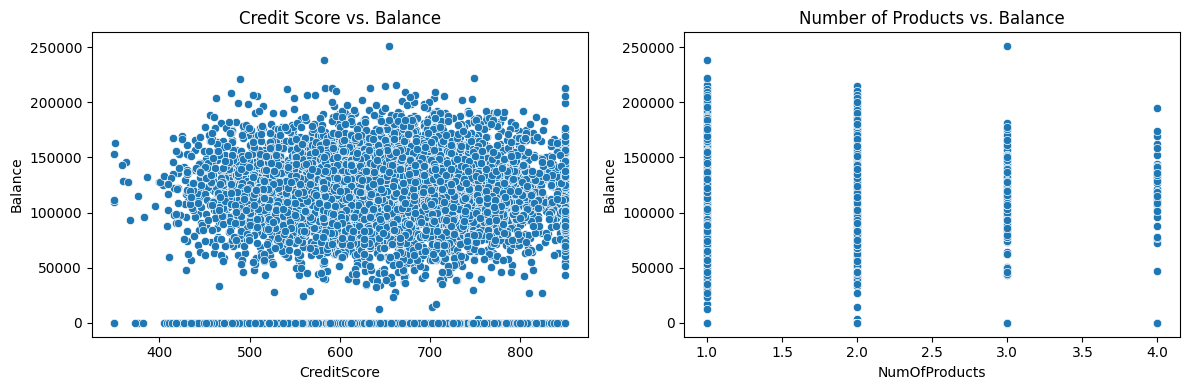

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = data[['CreditScore', 'Balance', 'NumOfProducts']].corr()

print("\nCorrelation Matrix:\n", correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Credit Score, Balance, and Number of Products')
plt.show()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(x='CreditScore', y='Balance', data=data)
plt.title('Credit Score vs. Balance')

plt.subplot(1, 2, 2)
sns.scatterplot(x='NumOfProducts', y='Balance', data=data)
plt.title('Number of Products vs. Balance')

plt.tight_layout()
plt.show()



Balance Statistics by Churn Status:
                 mean     median           std
Exited                                       
0       72742.750663   92063.06  62851.577108
1       91109.476006  109344.23  58346.483197


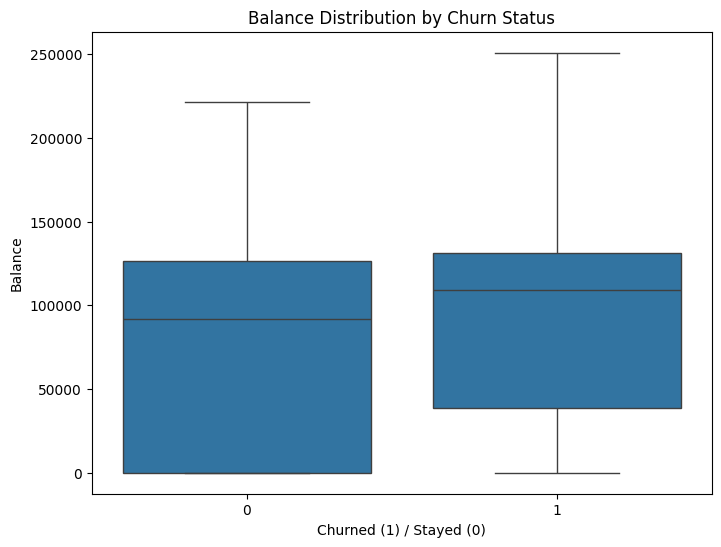


Transaction Statistics by Churn Status:
             mean  median       std
Exited                            
0       1.544210     2.0  0.509542
1       1.475466     1.0  0.801408


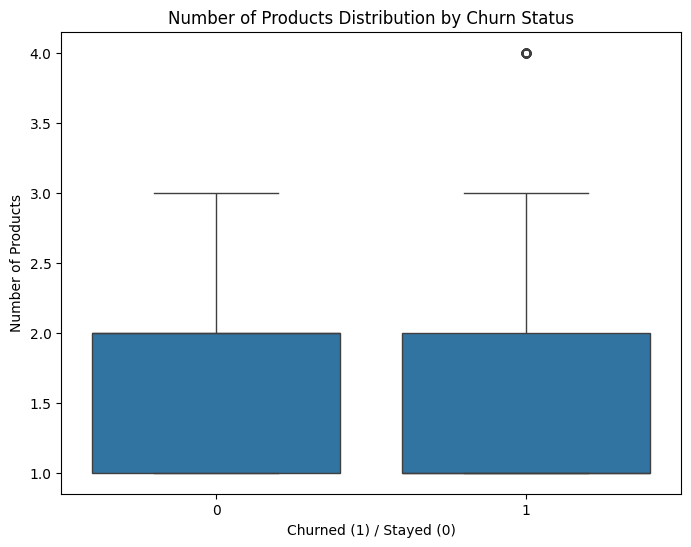

In [23]:
try:
    data = pd.read_csv('Bank_Customer.csv')
    balance_stats = data.groupby('Exited')['Balance'].agg(['mean', 'median', 'std'])
    print("\nBalance Statistics by Churn Status:\n", balance_stats)

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Exited', y='Balance', data=data)
    plt.title('Balance Distribution by Churn Status')
    plt.xlabel('Churned (1) / Stayed (0)')
    plt.ylabel('Balance')
    plt.show()

    transaction_stats = data.groupby('Exited')['NumOfProducts'].agg(['mean', 'median', 'std'])
    print("\nTransaction Statistics by Churn Status:\n", transaction_stats)

    plt.figure(figsize=(8,6))
    sns.boxplot(x='Exited', y='NumOfProducts', data=data)
    plt.title('Number of Products Distribution by Churn Status')
    plt.xlabel('Churned (1) / Stayed (0)')
    plt.ylabel('Number of Products')
    plt.show()


except FileNotFoundError:
    print("Error: 'Bank_Customer.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


In [24]:
low_credit_score_threshold = 500
high_balance_threshold = 100000

low_credit_high_balance_customers = data[
    (data['CreditScore'] < low_credit_score_threshold) & (data['Balance'] > high_balance_threshold)
]

total_customers = len(data)
customers_with_both = len(low_credit_high_balance_customers)
probability = customers_with_both / total_customers if total_customers > 0 else 0

print(f"The probability that a customer has both a low credit score (below {low_credit_score_threshold}) and a high balance (above {high_balance_threshold}) is: {probability:.4f}")


The probability that a customer has both a low credit score (below 500) and a high balance (above 100000) is: 0.0317
